In [82]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [83]:
#!pip uninstall tensorflow

In [84]:
#!pip install tensorflow==2.7.0

In [85]:
#Reading dataset

df=pd.read_csv('sample_data/loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [86]:
#Checking if there is na
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [87]:
#Extracting features into X
X=df.iloc[:,:-1]
X.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0


In [88]:
X.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000


In [89]:
y=df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: not.fully.paid, dtype: int64

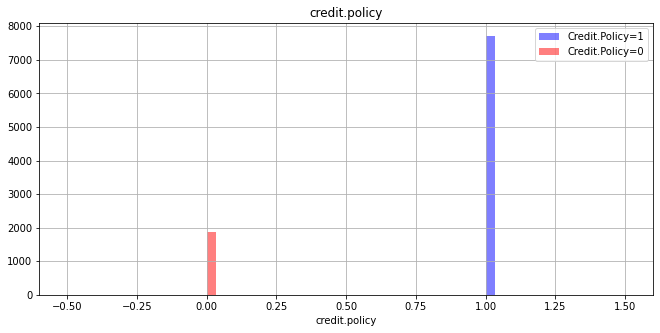

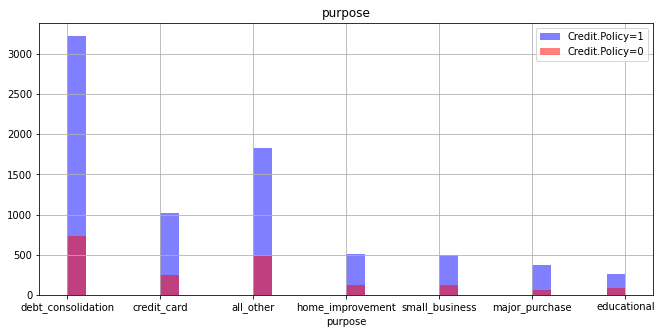

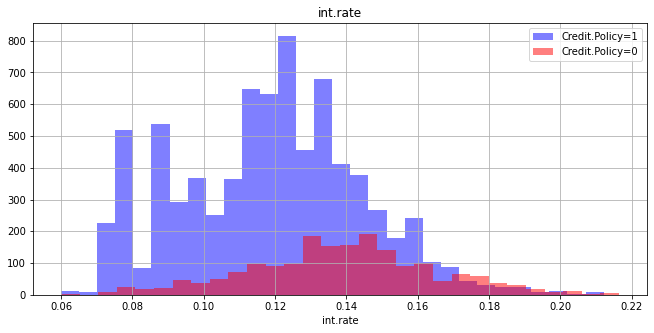

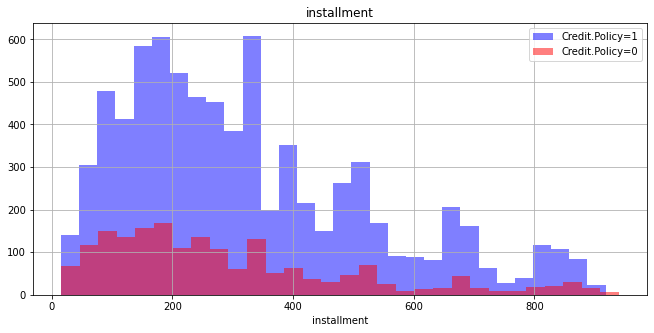

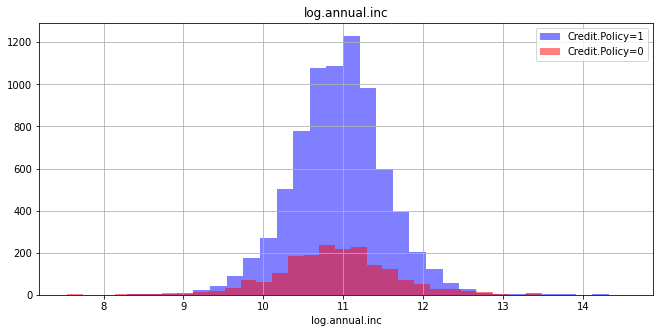

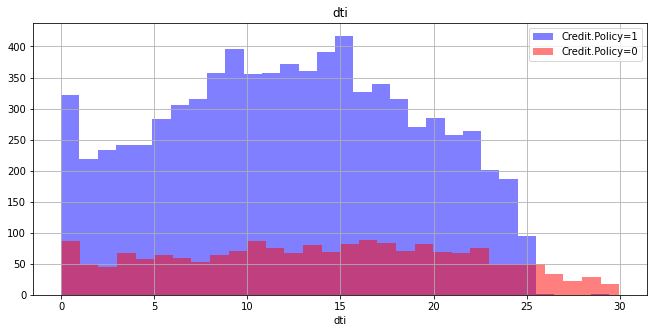

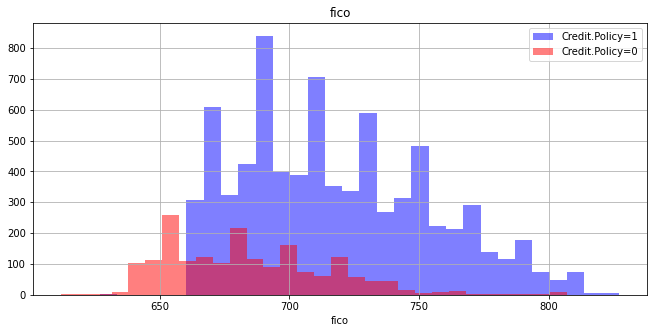

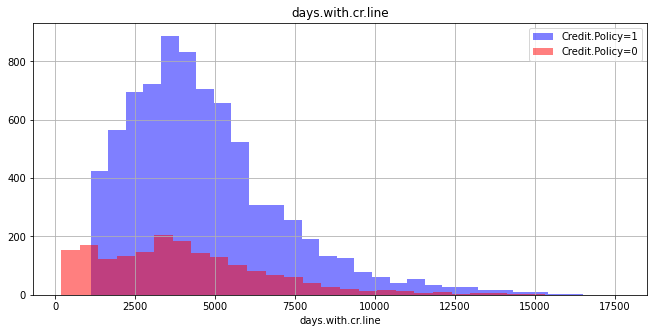

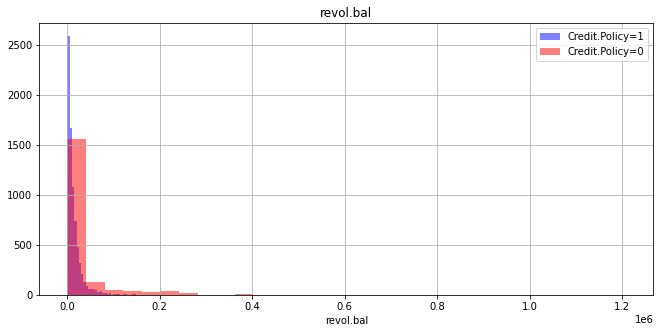

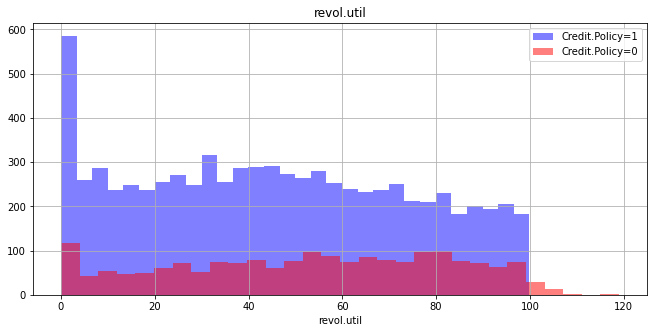

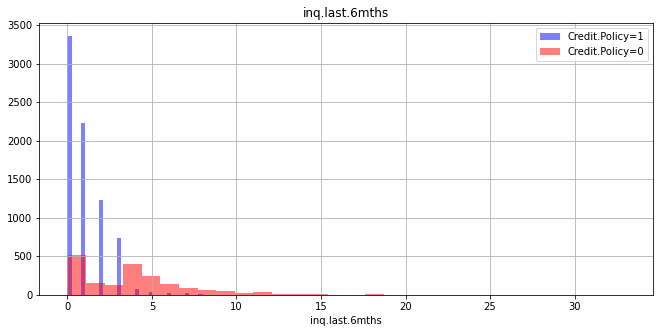

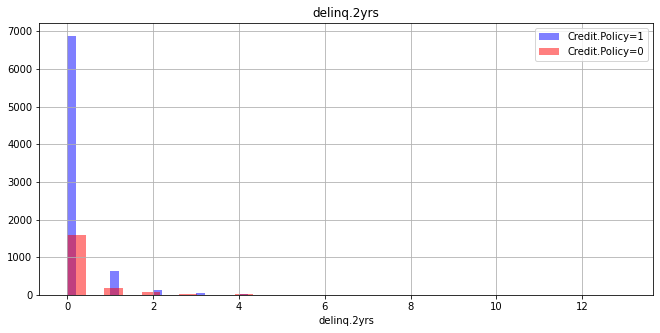

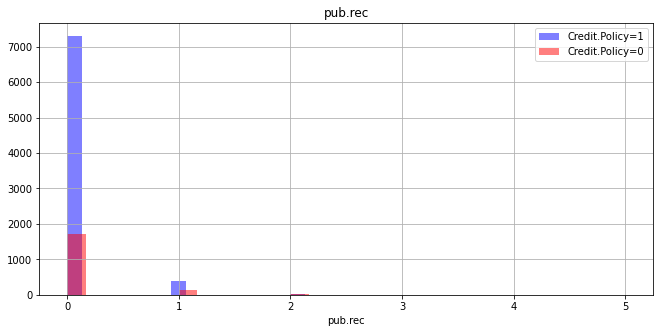

In [90]:
#Create a histogram for each of the feature against the credit.policy
#Exploratory Data Analysis

#Get all the feature names
features_names=X.columns

for feature in features_names:
    plt.figure(figsize=(11,5))
    df[df['credit.policy']==1][feature].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
    df[df['credit.policy']==0][feature].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
    plt.legend()
    plt.xlabel(feature)
    plt.title(feature)
    
    plt.show()

<Figure size 720x432 with 0 Axes>

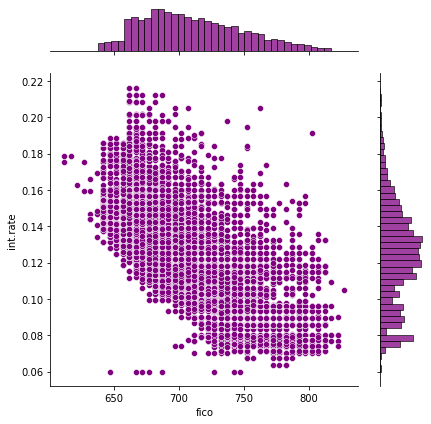

In [91]:
#understanding the correlation between FICO and the interest rate as the input desribes a correlation
plt.figure(figsize=[10,6])
sns.jointplot(x='fico',y='int.rate',data=df,color='purple', space=0.5)

<Figure size 792x504 with 0 Axes>

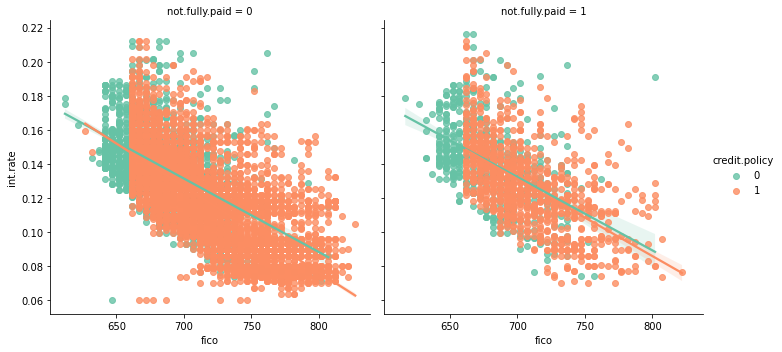

In [92]:
#understanding the correlation between FICO, interest rate, 
# credit policy and the not fully paid column "y"
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',
           col='not.fully.paid',palette='Set2')

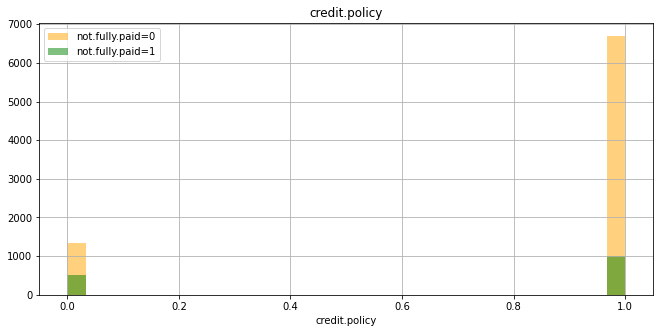

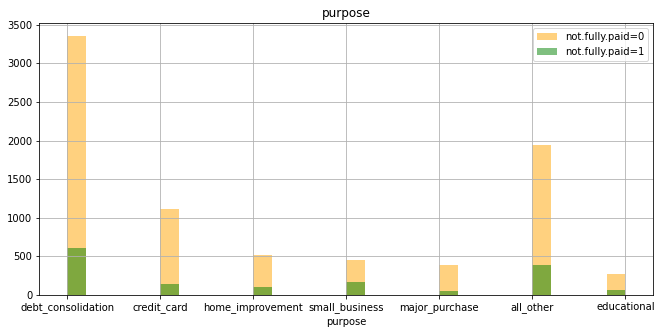

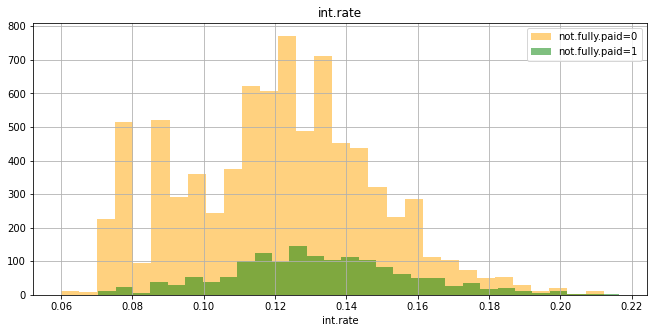

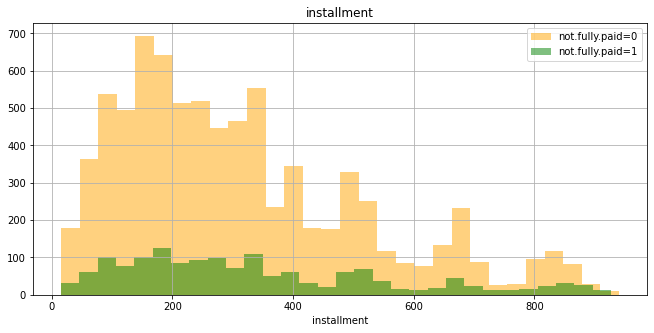

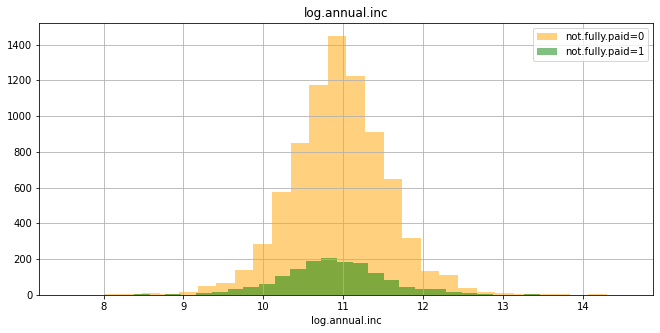

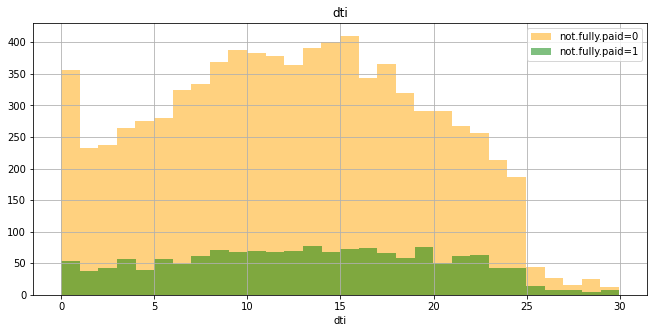

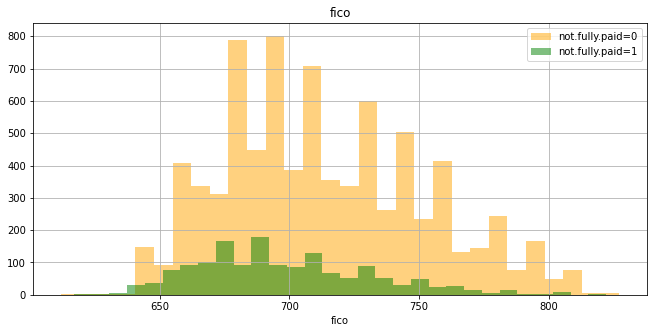

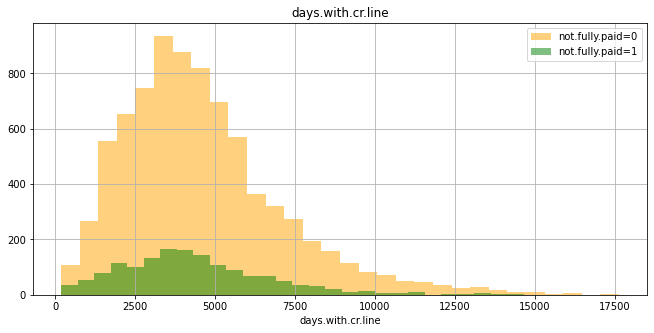

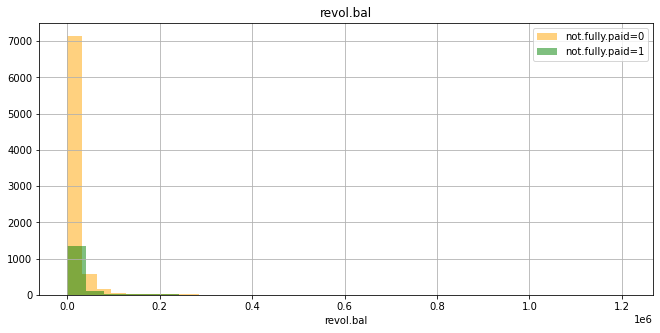

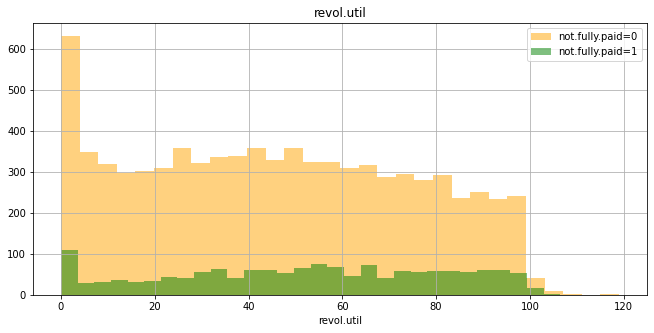

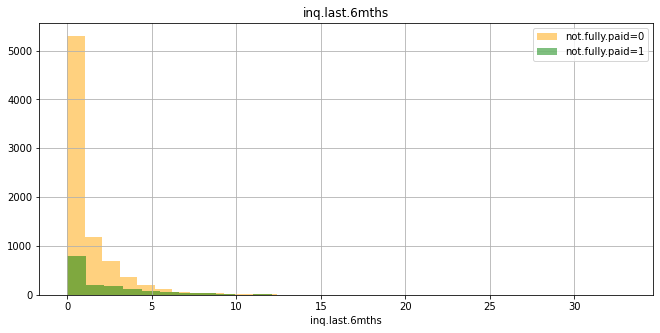

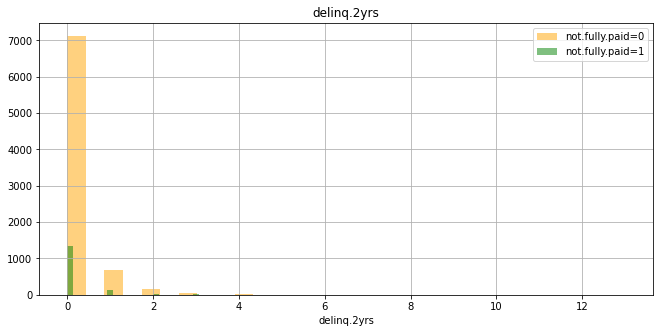

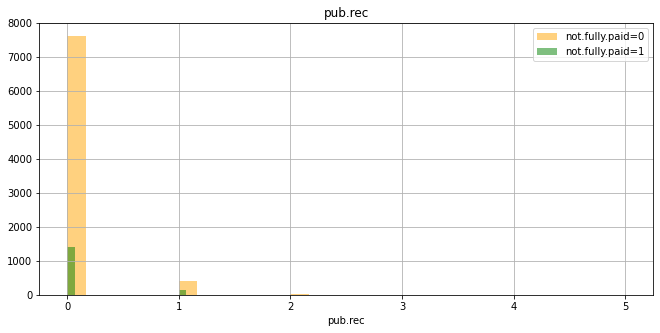

In [93]:
#Similarly understanding the correlation between the fatures and the target 
for col in features_names:
    plt.figure(figsize=(11,5))
    df[df['not.fully.paid']==0][col].hist(alpha=0.5,color='orange',
                                              bins=30,label='not.fully.paid=0')
    df[df['not.fully.paid']==1][col].hist(alpha=0.5,color='green',
                                              bins=30,label='not.fully.paid=1')
    plt.legend()
    plt.xlabel(col)
    plt.title(col)
    
    plt.show()

In [94]:
#Transform categorical values of "purpose" into numerical values
categorical_feature = ['purpose']
X = pd.get_dummies(X,columns=categorical_feature,drop_first=True)

                            credit.policy  int.rate  installment  \
credit.policy                    1.000000  0.294089     0.058770   
int.rate                         0.294089  1.000000     0.276140   
installment                      0.058770  0.276140     1.000000   
log.annual.inc                   0.034906  0.056383     0.448102   
dti                              0.090901  0.220006     0.050202   
fico                             0.348319  0.714821     0.086039   
days.with.cr.line                0.099026  0.124022     0.183297   
revol.bal                        0.187518  0.092527     0.233625   
revol.util                       0.104095  0.464837     0.081356   
inq.last.6mths                   0.535511  0.202780     0.010419   
delinq.2yrs                      0.076318  0.156079     0.004368   
pub.rec                          0.054243  0.098162     0.032760   
purpose_credit_card              0.003216  0.042109     0.000774   
purpose_debt_consolidation       0.020193  0.123

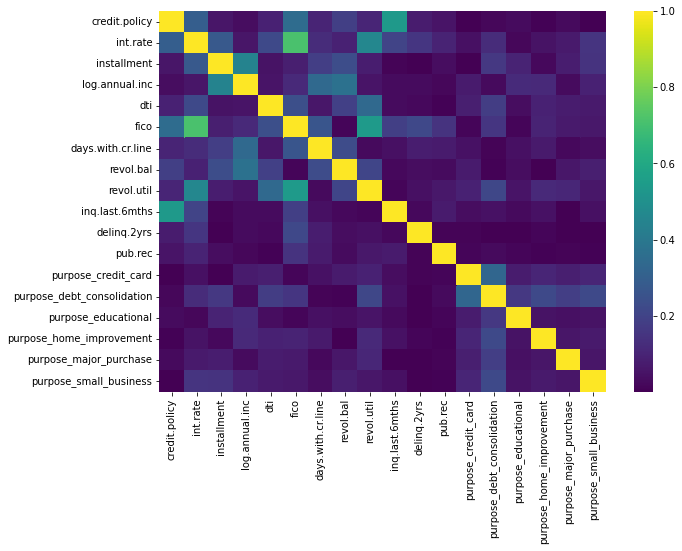

In [95]:
#Checking Coorelation between all through a heat map
cor_matrix = X.corr().abs()
print(cor_matrix)

plt.figure(figsize=[10,7])
sns.heatmap(data=cor_matrix, cmap='viridis', annot=False, fmt='.2g')

In [96]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [97]:
# ’revol.bal’, ‘days.with.cr.line’, ‘installment’, ‘revol.bal’ can be dropped.
# ‘days.with.cr.line’, ‘installment’, ‘revol.bal’ can represent by annual income. 
# 'revol.util' can represent by int.rate.

X.drop(columns=['revol.bal','days.with.cr.line','installment','revol.bal'], inplace=True)
#X = np.delete(X, np.s_[2], 1)
#X.delete('revol.bal', axis=1).values

In [98]:
X_train, X_test, y_train, y_test=train_test_split(X , y , test_size=0.2 , random_state=20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7662, 15) (1916, 15) (7662,) (1916,)


In [99]:
#Standarization using MINMAX Scaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train,y_train)
X_test_scaled = scaler.transform(X_test)

In [100]:
#Create the deep learning model
from tensorflow.keras.layers import BatchNormalization

#create a sequential model
model_DNN = Sequential()

#add model layers
model_DNN.add(Dense(32, activation='relu',input_shape=(15,)))
model_DNN.add(BatchNormalization())

model_DNN.add(Dense(10, activation='relu'))

model_DNN.add(Dense(5, activation='relu'))

model_DNN.add(Dense(1, activation='sigmoid'))

model_DNN.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32)                512       
                                                                 
 batch_normalization_4 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_17 (Dense)            (None, 10)                330       
                                                                 
 dense_18 (Dense)            (None, 5)                 55        
                                                                 
 dense_19 (Dense)            (None, 1)                 6         
                                                                 
Total params: 1,031
Trainable params: 967
Non-trainable params: 64
_____________________________________________________

In [101]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [102]:
# compile Model
model_DNN.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])


In [103]:
#Model fitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

model_DNN.fit(X_train_scaled,y_train,epochs=50,batch_size=125, validation_data=(X_test_scaled,y_test), callbacks=[early_stop])

Epoch 1/50
62/62 [==============================] - 1s 6ms/step - loss: 0.7092 - accuracy: 0.5799 - val_loss: 0.6334 - val_accuracy: 0.8346
Epoch 2/50
62/62 [==============================] - 0s 3ms/step - loss: 0.5498 - accuracy: 0.8363 - val_loss: 0.5594 - val_accuracy: 0.8346
Epoch 3/50
62/62 [==============================] - 0s 3ms/step - loss: 0.4701 - accuracy: 0.8389 - val_loss: 0.4660 - val_accuracy: 0.8346
Epoch 4/50
62/62 [==============================] - 0s 3ms/step - loss: 0.4274 - accuracy: 0.8404 - val_loss: 0.4393 - val_accuracy: 0.8346
Epoch 5/50
62/62 [==============================] - 0s 3ms/step - loss: 0.4177 - accuracy: 0.8408 - val_loss: 0.4314 - val_accuracy: 0.8335
Epoch 6/50
62/62 [==============================] - 0s 3ms/step - loss: 0.4156 - accuracy: 0.8419 - val_loss: 0.4266 - val_accuracy: 0.8330
Epoch 7/50
62/62 [==============================] - 0s 3ms/step - loss: 0.4123 - accuracy: 0.8421 - val_loss: 0.4237 - val_accuracy: 0.8335
Epoch 8/50
62/62 [==

In [104]:
#Prediction
pred_DNN=model_DNN.predict(X_test_scaled)

In [105]:
#Final evaluation
_,train_acc = model_DNN.evaluate(X_train_scaled,y_train,verbose=0)
_,test_acc = model_DNN.evaluate(X_test_scaled,y_test,verbose=0)
print('Final evaluation results \n''Train: %.3f, Test: %.3f' % (train_acc,test_acc))

Final evaluation results 
Train: 0.845, Test: 0.834
